In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


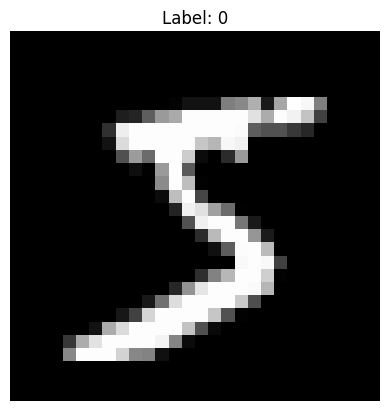

Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


In [13]:
# Load dataset (it splits into training and testing sets)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()

# Print dataset shapes to understand the data
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


In [14]:

# Normalize image pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [15]:
# Build the model
model = Sequential([
    # Flatten the 2D image into a 1D vector
    Flatten(input_shape=(28, 28)),

    # First dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),

    # Optional: Dropout layer to help prevent overfitting
    Dropout(0.2),

    # Output layer with 10 neurons (one for each digit) using softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=3,        # Try starting with 5 epochs
                    batch_size=32,   # Number of samples per gradient update
                    validation_split=0.1)  # Use 10% of training data for validation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8517 - loss: 0.5060 - val_accuracy: 0.9662 - val_loss: 0.1234
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9548 - loss: 0.1535 - val_accuracy: 0.9738 - val_loss: 0.0947
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9660 - loss: 0.1109 - val_accuracy: 0.9777 - val_loss: 0.0766


In [16]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

# Get the prediction for the first image in the test set
prediction = model.predict(np.expand_dims(x_test[0], axis=0))
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0964
Test accuracy: 0.9747999906539917


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted digit: 7


How many images do you want to display? 4
Enter the start index (0 to 59999): 99


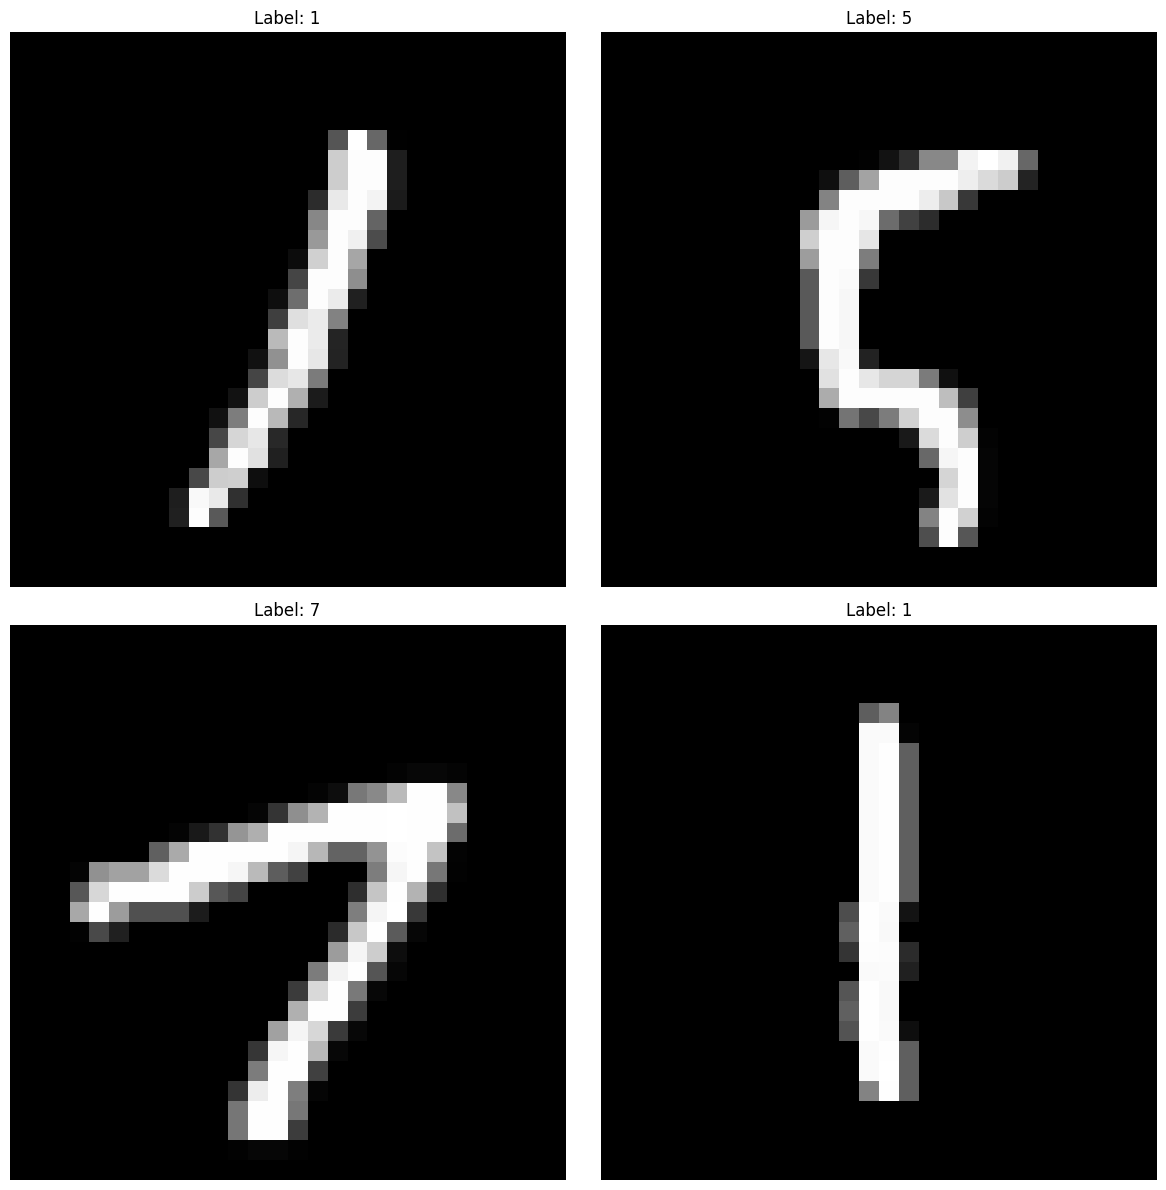

In [17]:


# Ask the user for the desired number of images and the start index
num_images = int(input("How many images do you want to display? "))
start_index = int(input(f"Enter the start index (0 to {len(x_train)-1}): "))

# Compute the end index automatically
end_index = start_index + num_images - 1

# Validate the computed end index against the dataset size
if end_index >= len(x_train):
    print(f"Warning: The computed end index ({end_index}) exceeds the dataset size ({len(x_train)}). Adjusting to the last available index.")
    end_index = len(x_train) - 1
    num_images = end_index - start_index + 1

# Generate the list of indices to display
indices = list(range(start_index, end_index + 1))

# Determine grid size automatically (creates a square-like grid)
grid_size = math.ceil(math.sqrt(len(indices)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
axes = axes.ravel()  # Flatten the grid for easier iteration

# Loop through the selected indices and display the images
for i, idx in enumerate(indices):
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[idx])}")
    axes[i].axis('off')

# Hide any unused subplots if the grid is larger than the number of images
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
